# Lab 1


In [13]:
import numpy as np

In [14]:
# Define vectors
x = np.array([1, 2])
y = np.array([-2, 1])

# Scalar product and vector norm
a = np.dot(x, y)
b = np.linalg.norm(x)
c = np.sqrt(x[0]**2 + x[1]**2)
print("%5.2f %5.2f %5.2f"%(a, b, c))

# angle between vectors
theta = np.arccos(np.dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y)))
print("Angle in Radians: %5.2f in Degrees: %5.2f"%(theta, theta*180/(np.pi)))




 0.00  2.24  2.24
Angle in Radians:  1.57 in Degrees: 90.00


In [15]:
# Define a square matrix
B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype=float)
print(B)
# Transpose, Inverse
print(B-B.T)
print(B @ np.linalg.inv(B)) #@ 是矩阵乘法运算符 等价于 np.matmul()


[[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.17961196e-16 1.00000000e+00 1.94289029e-16]
 [3.46944695e-17 0.00000000e+00 1.00000000e+00]]


In [16]:
# Quadratic form, we will see this often
z = np.array([1, 2, 3])
B = np.array([[3,2,1], [2,6,5], [1,5,9]], dtype=float)
print("%6.3f"%(z.T @ B @ z))
print(z.shape, B.shape)

182.000
(3,) (3, 3)


In [17]:
# Trace, determinant and Eigenvalues
print(B)
print(np.trace(B))
print(np.linalg.det(B))          #行列式（Determinant）np.linalg.det(B)
D, U = np.linalg.eig(B)
print("D: ",D)
# Eigenvectors
print("U:",U)
print("%5.2f"%(np.dot(U[:,0],U[:,1])))
print("%5.2f"%(np.dot(U[:,0], U[:,0])))
print("%5.2f"%(np.dot(U[:,0], U[:,2])))

[[3. 2. 1.]
 [2. 6. 5.]
 [1. 5. 9.]]
18.0
65.00000000000004
D:  [13.11766327  3.44324229  1.43909444]
U: [[-0.19527095 -0.74608451  0.63657455]
 [-0.59990492 -0.42261825 -0.67934373]
 [-0.77587586  0.5145403   0.3650547 ]]
-0.00
 1.00
-0.00


##  Q1 Answer
 The dot product between different eigenvectors is numerically zero (within machine precision), indicating they are orthogonal.

Proof:

Matrix B is real symmetric: B = Bᵀ

U contains eigenvectors of B as columns

D contains corresponding eigenvalues

Let:

v₁ = U[:,0] be the eigenvector corresponding to eigenvalue λ₁

v₂ = U[:,1] be the eigenvector corresponding to eigenvalue λ₂

λ₁ ≠ λ₂ (distinct eigenvalues)

From eigen definition:

B v₁ = λ₁ v₁
B v₂ = λ₂ v₂
Now consider v₂ᵀ B v₁:

v₂ᵀ B v₁ = v₂ᵀ (λ₁ v₁) = λ₁ (v₂ᵀ v₁)

Since B is symmetric (B = Bᵀ):

v₂ᵀ B v₁ = (B v₂)ᵀ v₁ = (λ₂ v₂)ᵀ v₁ = λ₂ (v₂ᵀ v₁)

Therefore:

λ₁ (v₂ᵀ v₁) = λ₂ (v₂ᵀ v₁)

(λ₁ - λ₂)(v₂ᵀ v₁) = 0

Since λ₁ ≠ λ₂, we must have:

v₂ᵀ v₁ = 0


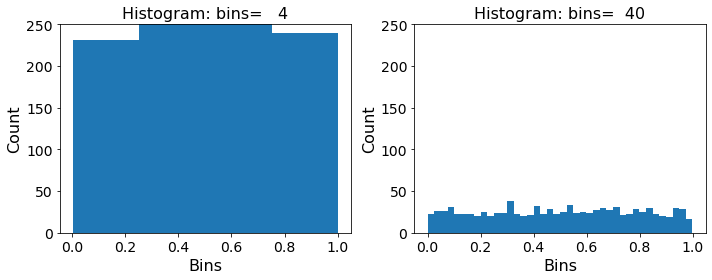

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
x = np.random.rand(1000, 1)
z = np.random.rand(1000, 1)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
n1bins, n2bins = 4, 40
ax[0].hist(x, bins=n1bins)
ax[0].set_ylim(0,250)
ax[0].set_xlabel("Bins", fontsize=16)
ax[0].set_ylabel("Count", fontsize=16)
ax[0].tick_params(axis='both', which='major', labelsize=14)
ax[0].set_title("Histogram: bins=%4d"%(n1bins), fontsize=16)
ax[1].hist(z, bins=n2bins)
ax[1].set_ylim(0,250)
ax[1].set_xlabel("Bins", fontsize=16)
ax[1].set_ylabel("Count", fontsize=16)
ax[1].tick_params(axis='both', which='major', labelsize=14)
ax[1].set_title("Histogram: bins=%4d"%(n2bins), fontsize=16)
plt.savefig("histograms_uniform.png")
plt.tight_layout()


## Q2
1. Why doesn't the histogram appear flat even though the data is from a uniform distribution?
    Primary Reasons:

    Sampling Variability: Any finite sample from a perfect uniform distribution will exhibit random fluctuations

    Law of Large Numbers Limitations: 1000 data points is insufficient for a perfectly smooth distribution

    Bin Count Effect:

    With 4 bins: Appears relatively flat because each bin contains ~250 points

    With 40 bins: Shows significant fluctuations because each bin contains only ~25 points

2. Why does the histogram look slightly different every time you run it?
    Key Reasons:

    Random Number Generation: np.random.rand() generates different sequences each execution

    Sample Variability: Different samples from the same distribution have different statistical properties

    Stochastic Nature: The histogram represents one realization of a random process
3. How would these observations change with more data?

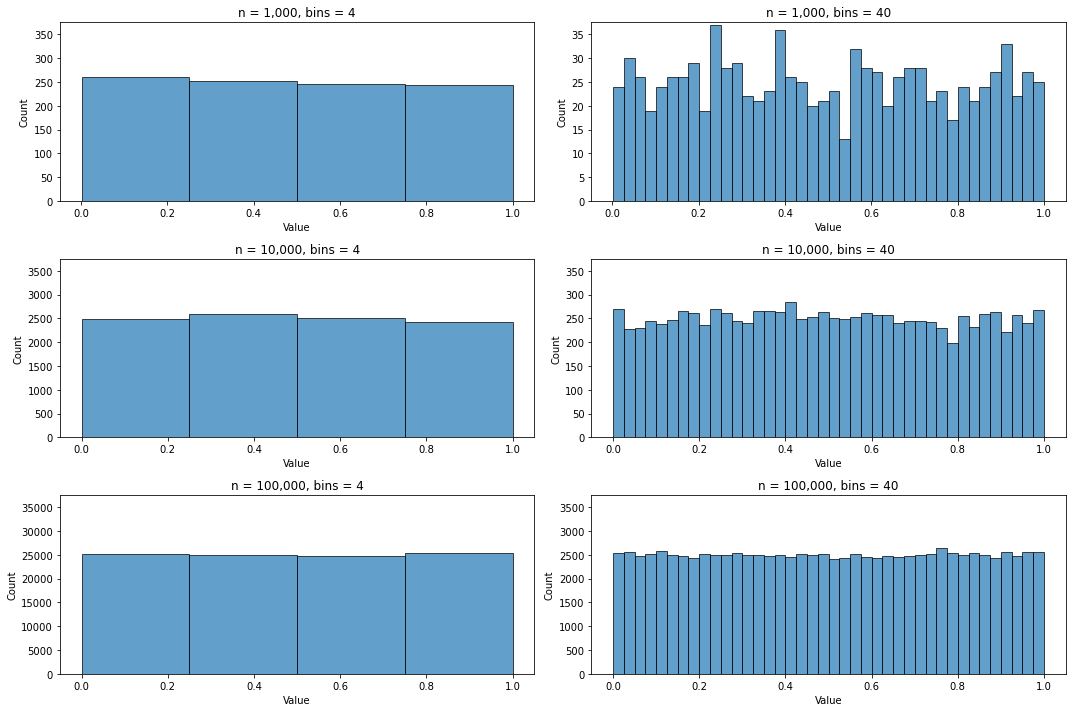

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Test different sample sizes
sample_sizes = [1000, 10000, 100000]
bin_configs = [4, 40]

plt.figure(figsize=(15, 10))

for i, n in enumerate(sample_sizes):
    data = np.random.rand(n)

    for j, bins in enumerate(bin_configs):
        plt.subplot(len(sample_sizes), len(bin_configs), i*len(bin_configs) + j + 1)
        plt.hist(data, bins=bins, alpha=0.7, edgecolor='black')
        plt.title(f'n = {n:,}, bins = {bins}')
        plt.ylim(0, n/bins * 1.5)
        plt.ylabel('Count')
        plt.xlabel('Value')

plt.tight_layout()
plt.savefig("histogram_comparison.png")
plt.show()


(array([  1.,   7.,  14.,  20.,  36.,  74.,  77., 116., 134., 131., 112.,
         81.,  86.,  56.,  32.,  15.,   4.,   2.,   0.,   2.]),
 array([-4.35363155, -3.8769875 , -3.40034344, -2.92369939, -2.44705533,
        -1.97041128, -1.49376723, -1.01712317, -0.54047912, -0.06383507,
         0.41280899,  0.88945304,  1.36609709,  1.84274115,  2.3193852 ,
         2.79602925,  3.27267331,  3.74931736,  4.22596141,  4.70260547,
         5.17924952]),
 <BarContainer object of 20 artists>)

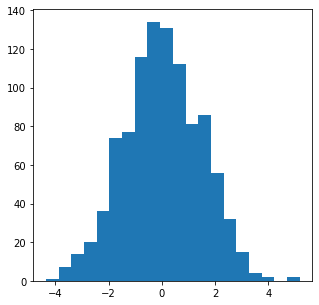

In [20]:
N=1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(12,1)) - np.sum(np.random.rand(12,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

## Q3
1. What Do You Observe?
    approximately normal distribution
    The distribution is centered around zero

2. How the Histogram Changes When Changing the Number of Uniform Random Numbers
    The picture shows below

3. Is there a theory that explains your observation?
    The Theory: Central Limit Theorem (CLT)
   The Central Limit Theorem states that the sum of a large number of independent, identically distributed random variables with finite mean and variance will approximate a normal distribution, regardless of the original distribution's shape.

(array([  2.,   4.,   6.,  19.,  20.,  47.,  62.,  83.,  98.,  94., 110.,
        112.,  99.,  77.,  66.,  42.,  30.,  13.,  10.,   6.]),
 array([-2.12925468, -1.92545133, -1.72164797, -1.51784462, -1.31404126,
        -1.1102379 , -0.90643455, -0.70263119, -0.49882784, -0.29502448,
        -0.09122112,  0.11258223,  0.31638559,  0.52018894,  0.7239923 ,
         0.92779565,  1.13159901,  1.33540237,  1.53920572,  1.74300908,
         1.94681243]),
 <BarContainer object of 20 artists>)

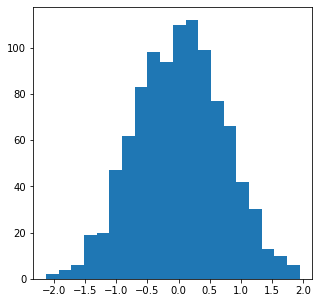

In [11]:
N=1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(3,1)) - np.sum(np.random.rand(3,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)


 shows a triangular

(array([  4.,   6.,   8.,  21.,  41.,  53.,  76.,  99., 119., 127., 127.,
        100.,  75.,  65.,  38.,  23.,   8.,   6.,   2.,   2.]),
 array([-131.24429739, -117.4730968 , -103.70189622,  -89.93069563,
         -76.15949505,  -62.38829446,  -48.61709388,  -34.84589329,
         -21.07469271,   -7.30349212,    6.46770846,   20.23890905,
          34.01010963,   47.78131021,   61.5525108 ,   75.32371138,
          89.09491197,  102.86611255,  116.63731314,  130.40851372,
         144.17971431]),
 <BarContainer object of 20 artists>)

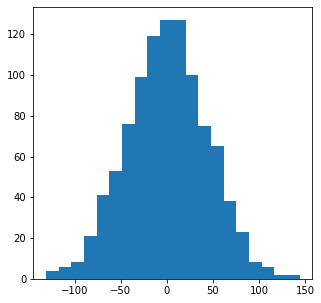

In [9]:
N=1000
x1 = np.zeros(N)
for n in range(N):
    x1[n] = np.sum(np.random.rand(11300,1)) - np.sum(np.random.rand(11300,1))
fig, ax = plt.subplots(figsize=(5,5))
ax.hist(x1, 20)

Nearly perfect normal distribution

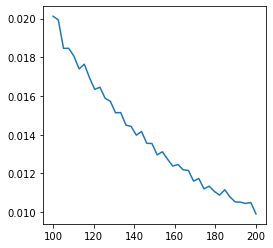

In [24]:
MaxTrial = 10000
sampleSizeRange = np.linspace(100, 200, 40)
plotVar = np.zeros(len(sampleSizeRange))
for sSize in range(len(sampleSizeRange)):
    numSamples = int(sampleSizeRange[sSize])
    vStrial = np.zeros(MaxTrial)
    for trial in range(MaxTrial):
        xx = np.random.randn(numSamples, 1)
        vStrial[trial] = np.var(xx)
    plotVar[sSize] = np.var(vStrial)
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(sampleSizeRange, plotVar)

In [12]:
def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = np.sqrt((2 * np.pi)**2 * dC)
    return num / den
def twoDGaussianPlot (nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

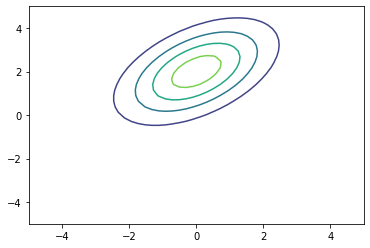

In [13]:
# Plot contours
nx, ny = 50, 40
m1 = np.array([0,2])
C1 = np.array([[2,1], [1,2]], np.float32)
Xp, Yp, Zp = twoDGaussianPlot(nx, ny, m1, C1)
plt.contour(Xp, Yp, Zp, 5)

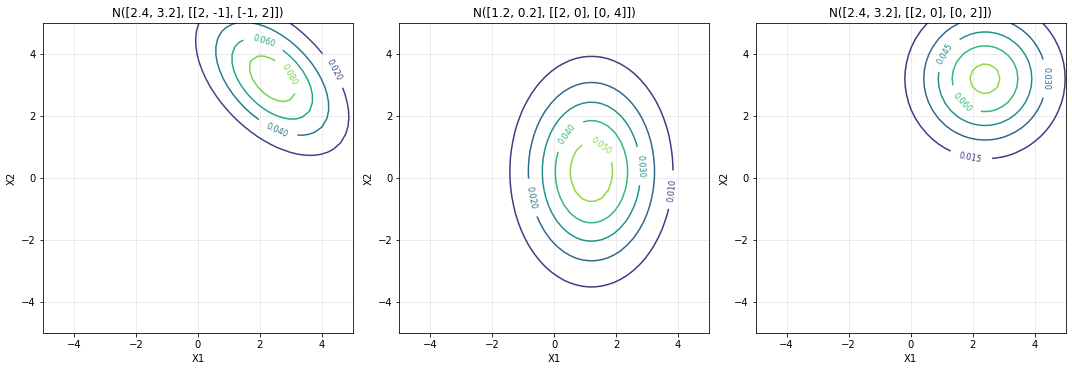

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def gauss2D(x, m, C):
    Ci = np.linalg.inv(C)
    dC = np.linalg.det(C)
    num = np.exp(-0.5 * np.dot((x - m).T, np.dot(Ci, (x - m))))
    den = np.sqrt((2 * np.pi)**2 * dC)
    return num / den

def twoDGaussianPlot(nx, ny, m, C):
    x = np.linspace(-5, 5, nx)
    y = np.linspace(-5, 5, ny)
    X, Y = np.meshgrid(x, y, indexing='ij')
    Z = np.zeros([nx, ny])
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]])
            Z[i,j] = gauss2D(xvec, m, C)
    return X, Y, Z

# 设置参数
nx, ny = 50, 40

# 定义三个分布的参数
# 第一个分布: N([2.4, 3.2], [[2, -1], [-1, 2]])
m1 = np.array([2.4, 3.2])
C1 = np.array([[2, -1], [-1, 2]], dtype=np.float32)

# 第二个分布: N([1.2, 0.2], [[2, 0], [0, 4]])
m2 = np.array([1.2, 0.2])
C2 = np.array([[2, 0], [0, 4]], dtype=np.float32)

# 第三个分布: N([2.4, 3.2], [[2, 0], [0, 2]])
m3 = np.array([2.4, 3.2])
C3 = np.array([[2, 0], [0, 2]], dtype=np.float32)

# 创建子图
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 绘制第一个分布的等高线
X1, Y1, Z1 = twoDGaussianPlot(nx, ny, m1, C1)
contour1 = axes[0].contour(X1, Y1, Z1, 5)
axes[0].clabel(contour1, inline=True, fontsize=8)
axes[0].set_title('N([2.4, 3.2], [[2, -1], [-1, 2]])')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')
axes[0].grid(True, alpha=0.3)
axes[0].set_aspect('equal')

# 绘制第二个分布的等高线
X2, Y2, Z2 = twoDGaussianPlot(nx, ny, m2, C2)
contour2 = axes[1].contour(X2, Y2, Z2, 5)
axes[1].clabel(contour2, inline=True, fontsize=8)
axes[1].set_title('N([1.2, 0.2], [[2, 0], [0, 4]])')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
axes[1].grid(True, alpha=0.3)
axes[1].set_aspect('equal')

# 绘制第三个分布的等高线
X3, Y3, Z3 = twoDGaussianPlot(nx, ny, m3, C3)
contour3 = axes[2].contour(X3, Y3, Z3, 5)
axes[2].clabel(contour3, inline=True, fontsize=8)
axes[2].set_title('N([2.4, 3.2], [[2, 0], [0, 2]])')
axes[2].set_xlabel('X1')
axes[2].set_ylabel('X2')
axes[2].grid(True, alpha=0.3)
axes[2].set_aspect('equal')

plt.tight_layout()
plt.savefig("three_gaussian_contours.png", dpi=300, bbox_inches='tight')
plt.show()

Vector u: [0.8660254 0.5      ]
Magnitude: 1.0
Angle: 59.99999999999999
Projected data shape: (5000,)
Projected variance: 2.872571511158082

Maximum variance: 3.002 at θ = 45.1°
Minimum variance: 1.013 at θ = 135.4°


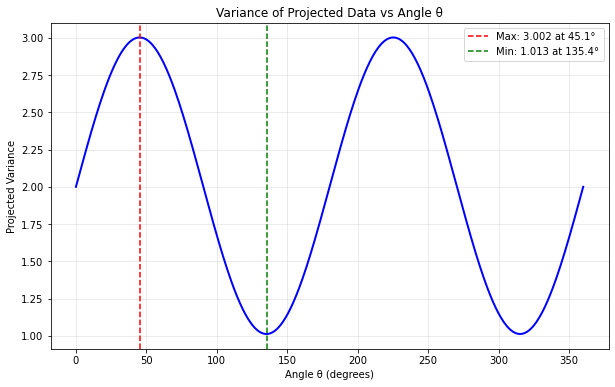


Eigenvalues of C: [3. 1.]
Eigenvectors of C:
  λ1 = 3.000: v1 = [0.70710678 0.70710678], angle = 45.0°
  λ2 = 1.000: v2 = [-0.70710678  0.70710678], angle = 135.0°


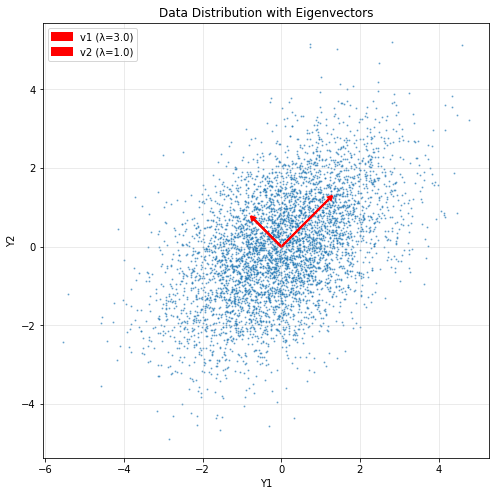

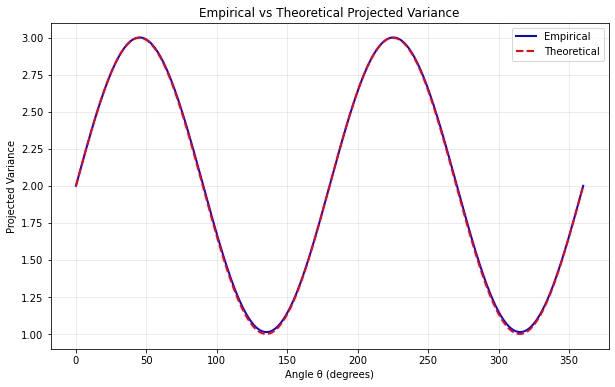


=== Analytical Derivation ===
Projected variance = uᵀ C u
where u = [sinθ, cosθ]ᵀ, C = [[2,1],[1,2]]
uᵀ C u = 2sin²θ + 2sinθcosθ + 2cos²θ
       = 2(sin²θ + cos²θ) + 2sinθcosθ
       = 2 + sin(2θ)

Verification - Max theoretical variance: 3.000
Verification - Min theoretical variance: 1.000


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate multivariate Gaussian data
C = np.array([[2.0, 1.0], [1.0, 2.0]])
A = np.linalg.cholesky(C)
Y = np.random.randn(5000, 2) @ A.T

# Test single direction
theta = np.pi/3
u = np.array([np.sin(theta), np.cos(theta)])
print("Vector u:", u)
print("Magnitude:", np.linalg.norm(u))
print("Angle:", theta * 180/np.pi)

yp = Y @ u
print("Projected data shape:", yp.shape)
print("Projected variance:", np.var(yp))

# Scan all angles and compute variances
theta_range = np.linspace(0, 2*np.pi, 360)
variances = []

for theta in theta_range:
    u = np.array([np.sin(theta), np.cos(theta)])
    yp = Y @ u
    variances.append(np.var(yp))

# Find maxima and minima
max_idx = np.argmax(variances)
min_idx = np.argmin(variances)
max_theta = theta_range[max_idx]
min_theta = theta_range[min_idx]
max_variance = variances[max_idx]
min_variance = variances[min_idx]

print(f"\nMaximum variance: {max_variance:.3f} at θ = {max_theta*180/np.pi:.1f}°")
print(f"Minimum variance: {min_variance:.3f} at θ = {min_theta*180/np.pi:.1f}°")

# Plot 1: Projection variance vs angle
plt.figure(figsize=(10, 6))
plt.plot(theta_range * 180/np.pi, variances, 'b-', linewidth=2)
plt.xlabel('Angle θ (degrees)')
plt.ylabel('Projected Variance')
plt.title('Variance of Projected Data vs Angle θ')
plt.grid(True, alpha=0.3)
plt.axvline(max_theta * 180/np.pi, color='red', linestyle='--', 
            label=f'Max: {max_variance:.3f} at {max_theta*180/np.pi:.1f}°')
plt.axvline(min_theta * 180/np.pi, color='green', linestyle='--', 
            label=f'Min: {min_variance:.3f} at {min_theta*180/np.pi:.1f}°')
plt.legend()
plt.savefig('projection_variance.png', dpi=300, bbox_inches='tight')
plt.show()

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
print(f"\nEigenvalues of C: {eigenvalues}")
print("Eigenvectors of C:")
for i in range(len(eigenvectors)):
    angle = np.arctan2(eigenvectors[1, i], eigenvectors[0, i])
    print(f"  λ{i+1} = {eigenvalues[i]:.3f}: v{i+1} = {eigenvectors[:, i]}, angle = {angle*180/np.pi:.1f}°")

# Plot 2: Data scatter plot with eigenvectors
plt.figure(figsize=(8, 8))
plt.scatter(Y[:, 0], Y[:, 1], alpha=0.5, s=1)
# Plot eigenvectors scaled by eigenvalues
for i in range(len(eigenvectors)):
    scale = np.sqrt(eigenvalues[i])
    plt.arrow(0, 0, eigenvectors[0, i]*scale, eigenvectors[1, i]*scale, 
              head_width=0.1, head_length=0.1, fc='red', ec='red', linewidth=2,
              label=f'v{i+1} (λ={eigenvalues[i]:.1f})')
plt.xlabel('Y1')
plt.ylabel('Y2')
plt.title('Data Distribution with Eigenvectors')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.savefig('eigenvectors.png', dpi=300, bbox_inches='tight')
plt.show()

# Plot 3: Theoretical vs empirical comparison
def theoretical_variance(theta, C):
    u = np.array([np.sin(theta), np.cos(theta)])
    return u.T @ C @ u

theoretical_variances = [theoretical_variance(theta, C) for theta in theta_range]

plt.figure(figsize=(10, 6))
plt.plot(theta_range * 180/np.pi, variances, 'b-', linewidth=2, label='Empirical')
plt.plot(theta_range * 180/np.pi, theoretical_variances, 'r--', linewidth=2, label='Theoretical')
plt.xlabel('Angle θ (degrees)')
plt.ylabel('Projected Variance')
plt.title('Empirical vs Theoretical Projected Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('empirical_vs_theoretical.png', dpi=300, bbox_inches='tight')
plt.show()

# Analytical derivation
print("\n=== Analytical Derivation ===")
print("Projected variance = uᵀ C u")
print("where u = [sinθ, cosθ]ᵀ, C = [[2,1],[1,2]]")
print("uᵀ C u = 2sin²θ + 2sinθcosθ + 2cos²θ")
print("       = 2(sin²θ + cos²θ) + 2sinθcosθ")
print("       = 2 + sin(2θ)")

# Verify analytical result
analytical_variances = 2 + np.sin(2 * theta_range)
print(f"\nVerification - Max theoretical variance: {np.max(analytical_variances):.3f}")
print(f"Verification - Min theoretical variance: {np.min(analytical_variances):.3f}")